# Introduction

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

## 1. Import Libraries and Data

In [2]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.subplots as sp

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from plotly.offline import init_notebook_mode,iplot

In [4]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Get descriptive statistics before EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In this dataset there are 11 fields. Their name and datatypes are as follows
- Rank - Ranking of overall sales - integer
- Name - The games name - object
- Platform - Platform of the games release (i.e. PC,PS4, etc.) - object
- Year - Year of the game's release - float
- Genre - Genre of the game - object
- Publisher - Publisher of the game - object
- NA_Sales - Sales in North America (in millions) - float
- EU_Sales - Sales in Europe (in millions) - float
- JP_Sales - Sales in Japan (in millions) - float
- Other_Sales - Sales in the rest of the world (in millions) - float
- Global_Sales - Total worldwide sales. - float

In [8]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [9]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

From the statistics, we can see that:<br>
    - There's a total of 16598 games in this dataset, with 271 missing value in the "Year" column, and 58 missing value in the "Publisher" column<br>
    - 75% games were released before 2010 and 50% of them were released before 2007
    - North America in general have the highest ammount of sales in video games, followed by Europe, Japan, and other regions

In [10]:
#Drop null value
df = df.dropna()

# EDA

**Platform**

Let's look at the platforms used to publish these video games.

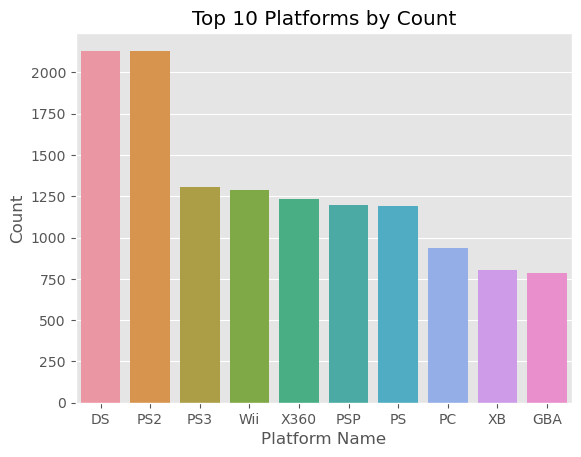

In [24]:
# Make a Bar plot of 10 most common Platforms
top_platforms = df['Platform'].value_counts().index[:10]

plt.style.use("ggplot")
top_platforms_df = df[df['Platform'].isin(top_platforms)]
sns.countplot(data=top_platforms_df, x='Platform', order=top_platforms)
plt.title("Top 10 Platforms by Count")
plt.xlabel("Platform Name")
plt.ylabel("Count")
plt.show()

**Top 100 Video Games**

Below is a scatter plot illustrating the sales of the top 100 video games across different regions. By hovering over the chart, you can see the number of sales in each region.

In [28]:
top100_games = df.head(100)

# Initialize a plotly graph object Figure and assign it to top100_game_sales_per_region
top100_game_sales_per_region = go.Figure()

regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
colors = ['#d32e4d', '#4fb3f9', '#55bca1', '#e4d747']
names = ['North America', 'Europe', 'Japan', 'Other']

for region, color, name in zip(regions, colors, names):
    top100_game_sales_per_region.add_trace(go.Scatter(
        x=top100_games['Rank'],
        y=top100_games[region],
        mode='markers',
        marker=dict(color=color, size=10),
        name=name,
        text=top100_games['Name']
    ))

top100_game_sales_per_region.update_layout(
    title='Top 100 Video Games Sales by Region',
    xaxis=dict(title='Rank'),
    yaxis=dict(title='Sales(In Millions)'),
    paper_bgcolor='#fdfdfd',
    plot_bgcolor='#fdfdfd',
    hovermode='x'
)

top100_game_sales_per_region.show()

- As seen on the top 100 video games, **North America** often has the **highest** sales, followed by Europe and Japan. Although North America and Europe sales in general have led to these rankings, There are 2 games: GTA: San Andreas (ranked 18) and Gran Turismo (ranked 48), which have **highest** sales in **Other regions**.

- Nintendogs (ranked 11), GTA 5 (ranked 17), Brain: Train Your Brain in Minutes a Day (ranked 20), Call of Duty: Black Ops II (ranked 35), Call of Duty: Modern Warfare 3 (ranked 38), Gran Turismo 5 (ranked 55), FIFA 16 (ranked 78), FIFA Soccer 2013 (ranked 83), The Sims 3 (ranked 84), Star Wars Battlefront (ranked 93), and Call of Duty: Advanced Warfare (ranked 94) are the **most sold** in the **European** region.

- Games that are sold the **most** in **Japan** are: Pokemon Black / Pokemon White (ranked 27), Animal Crossing: Wild World (ranked 42), Final Fantasy VII (ranked 67), Animal Crossing (ranked 74), Super Mario Kart (ranked 77),
Final Fantasy VIII (ranked 88)

- The top 10 video games with higest sale are as follows:
    1.  Wii Sports
    2.  Super Mario Bros
    3.  Mario Kart Wii
    4.  Wii Sports Resort
    5.  Pokemon Red/Pokemon Blue
    6.  Tetris
    7.  New Super Mario Bros
    8.  Wii Play
    9.  New Super Mario Bros Wii
    10. Duck Hunt

Next, let's have a look at the bubble graph to see the release years of top 100 video game sales

In [38]:
# Create a new column that combines the 'Name' and 'Year' columns
top100_games['Name_and_Year'] = top100_games['Name'] + ' (' + top100_games['Year'].astype(str) + ')'

release_year_top100_bubble_graph = px.scatter(top100_games, x='Rank', y='Year',
                 size='Global_Sales', color='Global_Sales',
                 color_continuous_scale='Blackbody',
                 labels={'x':'Rank', 'y':'Years'},
                 title='Release Years of Top 100 Video Games According to Global Sales',
                 hover_name='Name_and_Year',  # Use the new column as the hover name
                 hover_data=['Publisher', 'Platform', 'Genre', 'Global_Sales'])

release_year_top100_bubble_graph.update_layout(
    paper_bgcolor='#fdfdfd',
    plot_bgcolor='#fdfdfd',
    hovermode='x',
)

release_year_top100_bubble_graph.show()

- The bubble graph displays the release years and global sales ranking of video games. The size and color of each bubble represent the game's global sales. Hovering over a bubble will reveal additional information about the game.

- The graph shows that most of the top 100 best-selling games were released after 2000. This can be attributed to the rise of the internet and the resulting boom in online gaming, which has led to a multi-billion dollar industry.
<div style="text-align: center;">
    <img src="billion_industry.jpg" width="50%">
</div>

- During my exploration, I discovered that all of the top 15 video games were published by Nintendo. This prompted me to examine the proportion of top 100 video games publishers.

**Publishers**

This chart illustate the proportion of top 100 video games publishers.

In [39]:
# Count the number of games by each publisher
publisher_counts = top100_games['Publisher'].value_counts().reset_index()
publisher_counts.columns = ['Publisher', 'Count']

# Create a pie chart
publisher_top100_pie_chart = px.pie(publisher_counts, values='Count', names='Publisher', title='Top 100 Video Games Publisher Distribution')
publisher_top100_pie_chart.show()

- Out of the 100 games, Nintendo published 52, followed by Activision with 14, Take-Two Interactive with 9, Sony Computer Entertainment, and Microsoft Game Studios.

- Nintendo dominates the video game industry with 52 out of the top 100 games published by the company. This indicates the strong presence and popularity of Nintendo titles among gamers. As the oldest video game company, Nintendo is recognized for its expertise in hardware application and video game development. It is also one of the world's largest video game companies by market capitalization and has created some of the most popular video game franchises such as Mario, The Legend of Zelda, and Pokémon. Initially, Nintendo produced handmade hanafuda playing cards, but with its skill in the industry, it was able to take a leading position.

- Activision follows Nintendo with 14 games in the top 100, indicating the success of their franchises and the impact of their marketing and development efforts.

- Take-Two Interactive holds the third position with 9 games in the top 100. Their presence indicates the popularity of their titles such as Grand Theft Auto and Red Dead Redemption.

- Both Sony Computer Entertainment and Microsoft Game Studios have a noticeable but smaller presence in the top 100. This suggests that while they have strong offerings, they may not dominate the market to the same extent as Nintendo, Activision, or Take-Two Interactive.

- Let's have a further look at top 10 publishers by Global Sales in the video games industry

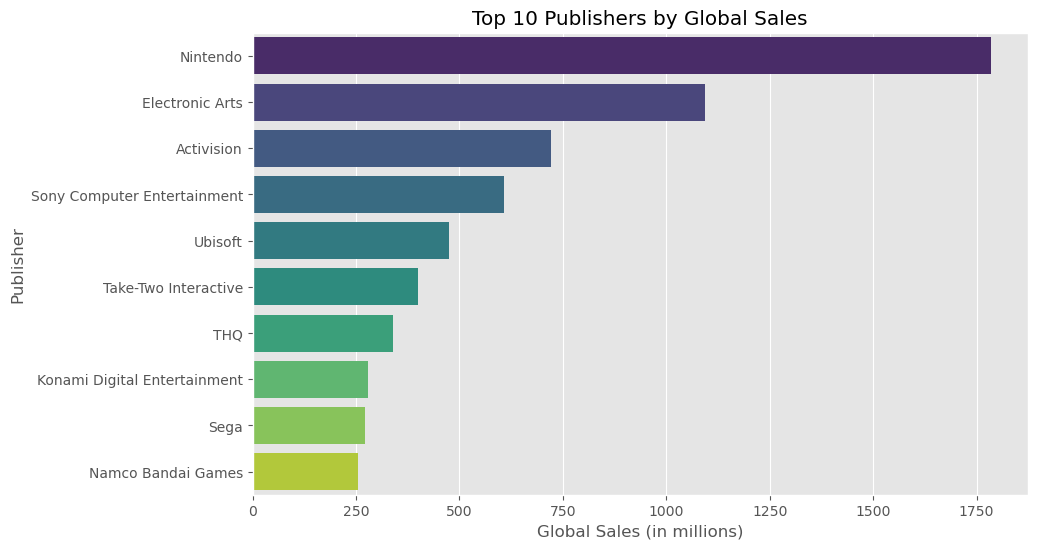

In [61]:
# Convert the Series to DataFrame and reset index
top10_publishers_by_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
top10_publishers_by_sales_df = top10_publishers_by_sales.reset_index()
top10_publishers_by_sales_df.columns = ['Publisher', 'Global_Sales']

plt.figure(figsize=(10, 6))
sns.barplot(x='Global_Sales', y='Publisher', data=top10_publishers_by_sales_df, palette='viridis')
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Publisher')
plt.show()

- It is notable that Nintendo has maintained its position as the leading publisher with approximately 1.8 billion dollars in sales. However, EA (Electronic Arts) has risen to become the second-highest publisher with over 1 billion dollars in sales. Activision, Sony Computer Entertainment, Ubisoft, and Take-Two Interactive follow closely behind. Most of these companies were already mentioned in the previous chart.

**Platforms**

Let's look at the platforms of different video games

In [52]:
most_common_platforms = df['Platform'].value_counts().head(10).reset_index()
most_common_platforms.columns = ['Platform', 'Count']

fig = px.bar(most_common_platforms, x='Platform', y='Count', title='Top 10 Most Common Platforms',
             color='Platform', color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

- In the list of top 10 gaming platforms, we can see that 3 of them belong to Nintendo, with DS ranking at the top, followed by Wii at rank 4 and GBA at rank 10. Similarly, 4 platforms are from Sony, with PS2 at rank 2, PS3 at rank 3, PSP at rank 6, and PS at rank 7. Meanwhile, 3 platforms are related to Microsoft or operate with Windows made by Microsoft, with X360 at rank 5, PC at rank 8, and XB at rank 9.

- All of the mentioned publishers, including Nintendo, Sony, and Microsoft, not only create and release games but also manufacture gaming hardware. This vertical integration gives them better control over the gaming ecosystem, allowing them to optimize both hardware and software to deliver seamless gaming experiences. It also enables them to use exclusive titles to boost hardware sales.

- Now that we have discussed the top 10 gaming platforms and publishers, let's dive into some of the most popular gaming genres.

**Genre**

Let's find some relation between Genre and Platform

In [60]:
# Use a pastel color palette
color_palette = px.colors.qualitative.Light24

# Calculate the genre counts for each platform
platform_genre_counts = df['Platform'].value_counts().sort_values(ascending=False)

# Create the histogram
fig = px.histogram(df, x='Platform', color='Genre', barmode='stack', category_orders={'Platform': platform_genre_counts.index}, color_discrete_sequence=color_palette)

# Update the layout
fig.update_layout(
    title='Genre Counts According to Platform',
    xaxis_title='Platform',
    yaxis_title='Count',
    paper_bgcolor='beige',
    plot_bgcolor='beige',
)

fig.show()

- There are several noteworthy data points to consider from the chart above. Let's focus on the PS2 genre. Out of the 391 sport-related games, 345 of them are action games, and 218 belong to the Misc genre. Action games are still popular on big console devices, such as PS3 X360, while Wii is an exception. Since Nintendo introduced their movement tracker controller, action games have become prominent on Wii, with 256 games in this genre.

- In contrast, sports aren't the strong suit for DS, which is a dual-screen handheld game console. Instead, Misc games take the lead with 389 games, followed by 335 action games, and 280 simulation games.

In [70]:
# Define a color dictionary
color_dict = {
    'NA_Sales': '#1f77b4',
    'EU_Sales': '#ff7f0e',
    'JP_Sales': '#2ca02c',
    'Other_Sales': '#d62728'
    # Add more if you have more regions
}
region_names = ['North America', 'Europe', 'Japan', 'Other Regions']

fig = sp.make_subplots(rows=2, cols=2, subplot_titles=region_names, vertical_spacing=0.15)

# Iterate over each region and add a bar chart to the subplot
for i, region in enumerate(regions, start=1):
    # Calculate the genre counts for each region
    region_genre_counts = df.groupby('Genre')[region].sum().sort_values(ascending=True)

    region_name = ['North America', 'Europe', 'Japan', 'Other Regions']

    # Create the histogram
    bar_chart = go.Bar(
        x=region_genre_counts.values,
        y=region_genre_counts.index,
        orientation='h',
        marker_color=color_dict[region],
        name=region_names[i-1],
        text=np.round(region_genre_counts.values),
        hoverinfo='none'
    )

    # Add the histogram to the subplot
    fig.add_trace(bar_chart, row=(i-1)//2+1, col=(i-1)%2+1)
    fig.update_xaxes(title_text="sales (in mil)", row=(i-1)//2+1, col=(i-1)%2+1)

# Update the layout
fig.update_layout(
    title='Total Sales According to Genre and Region',
    paper_bgcolor='#fdfdfd',
    plot_bgcolor='#fdfdfd',
    height=800
)

# Show the plot
fig.show()

- It has been observed that the majority of video games fall under the categories of Action, Sports, and Shooter. This trend is evident in the top three genres preferred by gamers in North America, Europe, and other regions. Meanwhile, in Japan, Role-Playing is the most favored genre, followed by Sports.

- This information is vital to keep in mind while planning marketing strategies for specific regions. To maximize profits, it's best to focus on Action, Sports, and Shooter genres in North America, Europe, and other regions. On the other hand, for Japan, the focus should be on Role-Playing, as it has double the sales compared to the second-favorite genre, Action.